<center><h1>TP Régression Logistique</h1></center>

<center><h1> SD211 </h1></center>

Je vous prie de bien vouloir vérifier que les fichiers .py .ipynb et les données sont bien dans le même dossier avant execution.

In [1]:
# Necessary imports
import math
import numpy as np
import matplotlib.pyplot as plt
from diabeticRetinopathyUtils import load_diabetic_retinopathy
from time import time

# 1- Régularisation de Tikhonov 

## Question 1.1:

On a :
$$ f_{1} (w_{0},w) =\dfrac {1} {n}\sum _{i=1}^{n}\log \left( 1+e^{-y_{i}\left( {x_{i}}^{T}w+w_{0}\right) }\right) +\dfrac {\rho } {2}\left\| w\right\| _{2}^{2} $$

avec: 

$  ~~~~~~~~ X=\left( \begin{matrix} x_{1}^{T}\\ \vdots \\ x_{n}^{T}\end{matrix} \right) \in \mathbb{R} ^{n\times p } ~,~~~~ W=\left( \begin{matrix} w_{1}\\ \vdots \\ w_{p}\end{matrix} \right) \in \mathbb{R} ^{ p \times 1 } ~,~~~~ Y=\left( \begin{matrix} y_{1}\\ \vdots \\ y_{n}\end{matrix} \right) \in \mathbb{R} ^{n \times 1 } ~,~~~~ w_{0} \in \mathbb{R} $

* **Gradient de $f_1$:**

$$ \nabla_{w_{0}}f_{1} = \frac{\partial f_{1}}{\partial w_{0}}=\frac{-1}{n}\sum_{i=1}^{n}{\frac{y_{i}}{1+exp(y_{i}(x_{i}^{T}w+w_{0}))}} 
$$

$$ \nabla_{w}f_{1}= \frac{\partial f_{1}}{\partial w}=\frac{-1}{n}\sum_{i=1}^{n}{\frac{y_{i}}{1+exp(y_{i}(x_{i}^{T}w+w_{0}))}x_{i}}+\rho w $$


donc: 

$$ \fbox{$\nabla f_{1}= \begin{pmatrix} 
\nabla_{w_{0}}f_{1} \\ 
\nabla_{w}f_{1} 
 \end{pmatrix} =  \begin{pmatrix} 
\frac{-1}{n}\sum_{i=1}^{n}{\frac{y_{i}}{1+exp(y_{i}(x_{i}^{T}w+w_{0}))}}  \\ 
\frac{-1}{n}\sum_{i=1}^{n}{\frac{y_{i}}{1+exp(y_{i}(x_{i}^{T}w+w_{0}))}x_{i}}+\rho w 
 \end{pmatrix} $}\in \mathbb{R} ^{\left( p+1\right) \times 1 }$$



* **Hessienne de $f_1$:**

Si on ajoute une colonne de "1" au début de la matrice X à l'indice 0, on obtient la matrice $\tilde{X} = \left( \begin{matrix} 1& x_{1}^{T}\\ 1& x_{2}^{T}\\ \vdots & \vdots \\ 1& x_{n}^{T}\end{matrix} \right)= \left( \begin{matrix} \tilde{x_{1}^{T}}\\ \vdots \\ \tilde{x_{n}^{T}}\end{matrix} \right) \in \mathbb{R} ^{n\times \left( p+1\right) }$ <br>

et si on désigne par   $\tilde{w} = \left( \begin{matrix} w_0\\ w\end{matrix} \right) \in \mathbb{R} ^{ (p+1) \times 1 } $ ,en calculant la matrice hessienne, on obtient donc:

Donc: 
$$\fbox{$H =  \dfrac {1} {n}\sum _{i=1}^{n}y_{i}^2 \dfrac{ {e}^{+ y_i\tilde{x_i}^{T} \tilde{w}} } { (1+{e}^{+ y_i\tilde{x_i}^{T} \tilde{w}})^2} \tilde{x_{i}} \tilde{x_{i}}^T + \rho (I_{p+1} - \left( \begin{matrix} 1& 0& \ldots & & 0\\ 0& 0& \ldots & & 0\\ & & \ddots & & \vdots \\ 0& 0& ..& .& 0\end{matrix} \right))$}  \in \mathbb{R} ^{\left( p+1\right) \times \left( p+1\right) }$$

Avec: 

$$\tilde{x_{i}} \tilde{x_{i}}^T= \left(\begin{matrix} 1& x_{i,1}& \ldots & & x_{i,p}\\ x_{i,1}& x_{i,1}^2& \ldots & & .\\ & & \ddots & & \vdots \\ x_{i,p}& .& ..& .& x_{i,p}^2\end{matrix}\right) ~~~  \in \mathbb{R} ^{(p+1)\times \left( p+1\right) }  ~,~~~~  \forall i \in\left[0,n\right]  $$  

et: 

$$I_{p+1} = \left( \begin{matrix} 1& 0& \ldots & & 0\\ 0& 1& \ldots & & 0\\ & & \ddots & & \vdots \\ 0& 0& ..& .& 1\end{matrix} \right) ~~~  \in \mathbb{R} ^{(p+1)\times \left( p+1\right) } $$


* **Convexité de $f_1$:**

Pour montrer que <b>$f_1$ </b> est <b>convexe</b>, il suffirait de montrer que la matrice hessienne <b>H</b> correspondante est <b>définie positive: </b><br><br>
Soit $ v\in \mathbb{R} ^{ p+1 }$,$v \neq 0^{ ~ p+1 }$, calculons $v^{T}Hv$ : <br>
$v^{T}Hv = \dfrac {1} {n}\sum _{i=1}^{n} \dfrac{ {e}^{+ y_i\tilde{x_i}^{T} \tilde{w}} } { (1+{e}^{+ y_i\tilde{x_i}^{T} \tilde{w}})^2} v^T\tilde{x_{i}} \tilde{x_{i}}^T v + \rho v^T(I_{p+1} - \left( \begin{matrix} 1& 0& \ldots & & 0\\ 0& 0& \ldots & & 0\\ & & \ddots & & \vdots \\ 0& 0& ..& .& 0\end{matrix} \right))v $ <br>
$v^{T}Hv = \dfrac {1} {n}\sum _{i=1}^{n} \beta_i (\tilde{x_{i}}^Tv)^2 + \rho \sum _{j=1}^{p}v_{j}^{2} > 0$ &nbsp; &nbsp; &nbsp; où &nbsp; $\beta_i = \dfrac{ {e}^{+ y_i\tilde{x_i}^{T} \tilde{w}} } { (1+{e}^{+ y_i\tilde{x_i}^{T} \tilde{w}})^2} > 0$ <br>
Donc H est définie positive, 

d'où <b>$f_1$ </b> est <b>convexe</b>.



In [2]:
# Importing the data
filename = 'diabeticRetinopathy.csv'
X,y = load_diabetic_retinopathy(filename);
# saving the data format
n = np.shape(X)[0]
p = np.shape(X)[1]
# Adding a column of ones to X to simplify calculations 
X_tilde = np.concatenate( (np.ones((n,1)),X), axis = 1 )

## Question 1.2:

In [3]:
# Calculating value, gradient and hessian of f1

# Required parameters that aren't defined inside the function
X, X_tilde, y, n, p
rho = 1/n

def calculatef1(w_0,w):
    w_tilde = np.concatenate(([w_0],w), axis=0) #create a vector of w_0 and w 
    temp = np.exp( -y*X_tilde.dot(w_tilde) ) #frequent expression 
    
    #value of f1
    v1 = rho * ((np.linalg.norm(w))**2) / 2
    v2 = np.mean( np.log( 1 + temp ) )
    f1 = v1 + v2
    
    #grad of f1
    expy = np.exp( y*X_tilde.dot(w_tilde) )
    gradf1 = np.zeros((p+1,1))
    gradf1[0] = np.mean( -y*temp/(1+temp) )
    for j in range(1,p+1):
        gradf1[j] = np.mean( -y*X[:,j-1]*temp / (1+temp) ) + rho*w[j-1]
    
    #Hessian of f1
    v = np.exp( y*(X_tilde.dot(w_tilde)))
    # We need the reshape cause X_tilde[i,:]'s shape is (20,) multiplying with X_tilde[i,:].T will output a scalar not a matrix as expected
    H_ = 1/n * sum( v[i] / ((1+ v[i])**2) * ( np.reshape(X_tilde[i,:],(p+1,1)).dot(np.reshape(X_tilde[i,:],(1,p+1))) ) for i in range(n) )  
    A = np.identity(p+1)
    A[0,0] = 0
    H = H_ + rho * A
    
    return f1, gradf1, H

In [4]:
# Checking the function's output
#f,gra,H = calculatef1(1,np.ones((19,)))
#print ('Calculating f1 for w = \n %s \n' % np.ones((p+1,)))
#print ('The value of the function f1 is \n %f \n' % f)
#print ('The calculated gradient is : \n %s \n' % gra )
#print ('The calculated Hessian is : \n %s \n' % H )

Verification du gradient par la fonction check_grad

In [5]:
# locally needed imports
from numpy import ravel
from scipy.optimize import check_grad

def func_f1(w_tilde):
    return calculatef1(w_tilde[0], w_tilde[1:])[0]

def func_gradf1(w_tilde):
    return calculatef1(w_tilde[0], w_tilde[1:])[1].ravel()

w_tilde = np.zeros((p+1,))

error = check_grad(func_f1,func_gradf1,w_tilde)
print ('absolute error is : %e ' % error)
rel_error = error / np.linalg.norm(func_gradf1(w_tilde))
print ('relative error is : %e ' % rel_error)

absolute error is : 3.669272e-08 
relative error is : 1.116008e-07 


La valeur de l'erreur étant non significative, on pourra affirmer que l'implémentation et le calcul du gradient sont corrects.

## Question 1.3:

In [6]:
# needed parameters that are not defined inside the function
X, X_tilde, y, n, p, rho

# simple Newton's method
def newton(f,w_tilde0):
    t = time()
    itera = 0
    g_norms = []
    w_tilde = w_tilde0
    while True:
        itera += 1
        try :
            _,g,h = f( np.reshape(w_tilde[0],()), np.reshape(w_tilde[1:],(p,))) 
            w_tilde = np.reshape(w_tilde,(20,1)) - np.linalg.inv(h).dot(g)
            g_norm = np.linalg.norm(g)
            if math.isnan(g_norm): #if the value reached is nan
                print('Overflow !')
                return None, None
        except OverflowError: #if the values overflow
            print("Overflow !")
            return None, None
        g_norms.append(g_norm) #saving the gradient's norms to plot them later
        if (g_norm < 10**(-10)):
            print("Newton's method terminated in %d iterations" % itera)
            print("Newton's method terminated in %f ms" % (1000*(time()-t)) ) 
            break;
    return w_tilde, g_norms

Newton's method terminated in 9 iterations
Newton's method terminated in 116.150379 ms


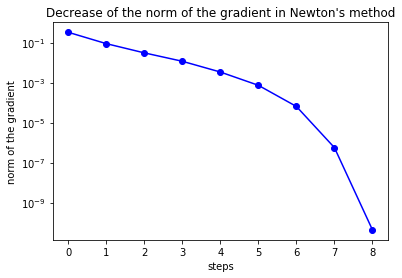

In [7]:
w_tilde0 = np.zeros((p+1,))
# applying newton's method starting from w_tilde0
w_tilde_star, g_norms = newton(calculatef1,w_tilde0)

plt.plot(g_norms,'bo-')
plt.yscale('log')
plt.title("Decrease of the norm of the gradient in Newton's method")
plt.xlabel("steps")
plt.ylabel("norm of the gradient")
plt.show()

 $\Rightarrow $ On note que la norme du gradient décroit au fur et à mesure qu'on itère.
 
 Pour cette condition initiale $(w_0⁰,w⁰)=0$, l'algorithme de Newton <b>converge</b> vers la solution.

In [8]:
# Retrieved solution for (w0,w)_init = 0
np.reshape( w_tilde_star , (1,20) ) #reshaping just for display purpose

array([[ 0.67731198,  0.28526576, -0.24554742,  5.61365006,  0.9888679 ,
        -1.82791918, -2.55695256, -1.58747255,  0.43396361,  0.48515529,
        -0.40441764,  0.17280405, -0.57564945,  0.43832626, -0.62435831,
         1.25356177,  0.72621094, -0.00607139, -0.1490878 , -0.09505212]])

## Question 1.4:

In [9]:
w_tilde03 = 0.3*np.ones((p+1,))
# applying newton's method starting from w_tilde03
w_tilde_03, g_norms03 = newton(calculatef1,w_tilde03)

Overflow !


/home/jeghampc/Softwares/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: overflow encountered in double_scalars
/home/jeghampc/Softwares/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in exp
  if __name__ == '__main__':
/home/jeghampc/Softwares/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in exp
/home/jeghampc/Softwares/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide
/home/jeghampc/Softwares/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide
/home/jeghampc/Softwares/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in multiply
/home/jeghampc/Softwares/anaconda2/envs/py36/lib/python3.6/site-packages

$\Rightarrow $ En changeant le point d'initialisation de <b> w_tilde0 </b> à <b> w_tilde03 </b>, l'algorithme ne converge plus. 
En effet, le code retourne une exception vu qu'au cours des itérations, le gradient prend de grandes valeurs.
L'algorithme de Newton à pas constant ne donne pas une solution que si le point de départ est suffisamment proche de la solution (c'est à dire le point où le min est atteint).



## Question 1.5:

De façon générale,  l'algorithme de Newton dépend du choix de l’initialisation $w_{init}$ et des propriétés de la fonction qui doit être 3-différentiable. 

Donc une façon pour remédier à ce problème est d'utiliser la recherche linéaire (<b> Armijo's Linear Search Method ) </b> dont le principe est le suivant: 

Etant donnés $a$ ∈ (0, 1),$b$ > 0 et $β$ ∈ (0, 1), on veut determiner le meilleur entier $l$ vérifiant l'inégalité suivante: 

$$\quad f(x^+ (ba^l)) ≤ f(x_{k}) + β <∇f(x_{k}), x^+ ba^l − x_{k}> $$

avec: $\gamma_{k} =  ba^l $

et $ \quad x^+ (\gamma_{k}) = x^+ (ba^l) = x_{k} - \gamma_{k} \nabla f (x_{k})$ 

ici on prend $f = f_{1} $et $x= $w_tilde , on aura alors: 

<h4> Remarque : </h4>
le choix des paramètres a été effectués en choisissant plusieurs valeurs des paramètres. Finalement, on a choisi $b=1$, $a=0.5$ et $\beta=0.5$ 

In [10]:
# needed parameters that are not defined inside the function
X, X_tilde, y, n, p, rho

#Newton's method with linear search
def linearNewton(f,w_tilde0,a=0.5,b=1,beta=0.5):
    itera = 0
    t = time()
    g_norms = []
    w_tilde = w_tilde0
    while True:
        itera += 1
        print(",", end='') #just printing to make sure the algorithm is still running
        f_k,g,h = f( np.reshape(w_tilde[0],()), np.reshape(w_tilde[1:],(p,))) 
        l=0
        while True:
            print(".", end='') #just printing to make sure the algorithm is still running
            w_plus = np.reshape(w_tilde,(p+1,1)) - b*(a**l)*np.linalg.inv(h).dot(g)
            f_plus = f( np.reshape(w_plus[0],()), np.reshape(w_plus[1:],(p,)))[0]
            term_d = f_k + beta * np.reshape( np.transpose(g).dot( np.reshape(w_plus,(20,1))-np.reshape(w_tilde,(20,1)) ) ,())
            if f_plus > term_d:
                l = l+1
            else:
                break;
        w_tilde = np.reshape(w_tilde,(p+1,1)) - b*(a**l)*np.linalg.inv(h).dot(g)
        g_norm = np.linalg.norm(g)
        if math.isnan(g_norm):
            print()
            print('Overflow !')
            return None, None
        g_norms.append(g_norm)
        if (g_norm < 10**(-10)):
            print()
            print("Newton's method with linear search terminated in %d iterations" % itera)
            print("Newton's method with linear search terminated in %f ms" % (1000*(time()-t)))
            break;
    return w_tilde, g_norms

In [11]:
# Starting from the same previous starting point w_tilde03 but using linear search
w_tilde03_star, nor03 = linearNewton(calculatef1,w_tilde03)

,..,.,.,.,.,.,..,..,.,.
Newton's method with linear search terminated in 10 iterations
Newton's method with linear search terminated in 348.394156 ms


In [12]:
# Retrieved solution from w_tilde03 and with newton's method with linear search
print( np.reshape(w_tilde03_star, (1,20))) #reshaping just for display purpose

[[ 0.67731198  0.28526576 -0.24554742  5.61365006  0.9888679  -1.82791918
  -2.55695256 -1.58747255  0.43396361  0.48515529 -0.40441764  0.17280405
  -0.57564945  0.43832626 -0.62435831  1.25356177  0.72621094 -0.00607139
  -0.1490878  -0.09505212]]


# 2- Régularisation par la parcimonie 

## Question 2.1:

On a:  $$F_2 = \dfrac {1} {n}\sum _{i=1}^{n}\log \left( 1+e^{-y_{i}\left( {x_{i}}^{T}w+w_{0}\right) }\right) + \rho \left\| w\right\| _{1}$$ <br>

La méthode de Newton suppose que la fonction est 3-différentiable . Or cette condition n'est pas vérifiée dans ce cas. <br> 
En effet, $w_{1}\rightarrow \rho \left\| w\right\| _{1}$ n'est même pas de classe $C^1$ sur $ \mathbb{R} ^{p}$ (n'est pas strictement différentiable) 

donc la méthode de Newton n'est pas applicable dans ce cas.

## Question 2.2:

On a:  $$F_2 = \dfrac {1} {n}\sum _{i=1}^{n}\log \left( 1+e^{-y_{i}\left( {x_{i}}^{T}w+w_{0}\right) }\right) + \rho \left\| w\right\| _{1}$$ <br>
* **Décomposition de $F_2$:** 

on décompse $F_2$ sous la forme $F_2 = f_2 + g_2$ où $$\boxed{f_2 = \dfrac {1} {n}\sum _{i=1}^{n}\log \left( 1+e^{-y_{i}\left( {x_{i}}^{T}w+w_{0}\right) }\right)}$$  et $$\boxed{g_2 = \rho \left\| w\right\| _{1}}$$

* **Formule de l'opérateur Proximal de $g_2$:** 

On a: 
$g(w) = \rho \sum _{i=1}^{p}\left| w_{i}\right|$

la fonction $g_2(w)$ est séparable et son proximal a été calculée dans le cours et dans le TD;

$$
\textrm{prox}_{g_{2}}:\left(\omega\right)\mapsto\left(\begin{array}{l}
\textrm{prox}_{g_{21}}\left(\omega\right)\\
\textrm{prox}_{g_{22}}\left(\omega\right)\\
...\\
\textrm{prox}_{g_{2n}}\left(\omega\right)
\end{array}\right) , ~~~~~~~~~~~~avec ~~~~ \omega=\left(\begin{array}{l}
\omega_{1}\\
...\\
\omega_{n}
\end{array}\right) 
$$ 
c'est à dire:
$$ p = (prox_{g_2}(w))_i = \arg\min_{y \in \mathbb{R}}(\rho \left|y\right| + \frac{(y-x)^2}{2})$$ <br>


donc pour tout $ i\in\{1,..,n\}$ :
$$   
\textrm{prox}_{g_{2i}}:\left(\omega\right)\mapsto\begin{cases}
\omega_{i}-\rho & \omega_{i}\geq\rho\\
0 & \left|\omega_{i}\right|<\rho\\
\omega_{i}+\rho & \omega_{i}\leq-\rho
\end{cases}
$$

* **Gradient de $f_2$:** 

Le gradient de $f_2$ se déduit facilement de celui de $f_1$

$$ \fbox{$\nabla f_{2}= \begin{pmatrix} 
\nabla_{w_{0}}f_{2} \\ 
\nabla_{w}f_{2} 
 \end{pmatrix} =  \begin{pmatrix} 
\frac{-1}{n}\sum_{i=1}^{n}{\frac{y_{i}}{1+exp(y_{i}(x_{i}^{T}w+w_{0}))}}  \\ 
\frac{-1}{n}\sum_{i=1}^{n}{\frac{y_{i}}{1+exp(y_{i}(x_{i}^{T}w+w_{0}))}x_{i}} 
 \end{pmatrix} $}\in \mathbb{R} ^{\left( p+1\right) \times 1 }$$

* **Convexité de $F_2$:** 

$F_2$ est convexe car $g_2$ et $f_2$ le sont. En effet, la convexité de $f_2$ se démontre de façon similaire à la partie 1 et $g_2$ est une multiplication de la norme-1 par $\rho$


In [13]:
rho = 0.1

In [14]:
# needed parameters that are not defined inside the function
p, X_tilde, X, y, rho

def calculatef2(w_tilde):
    if ( len(w_tilde) != p+1 ):
        print(" __ calculatef2 __ Inappropriate w_tilde length")
    w_tilde = np.reshape(w_tilde, (p+1,1))
    temp = np.exp( -y*X_tilde.dot(w_tilde) ) #frequent expression 
    
    #value of f2
    f2 = np.mean( np.log( 1 + temp ) )
    
    #grad of f2
    expy = np.exp( y*X_tilde.dot(w_tilde) )
    gradf2 = np.zeros((p+1,1))
    gradf2[0] = np.mean( -y*temp/(1+temp) )
    for j in range(1,p+1):
        gradf2[j] = np.mean( -y*X[:,j-1]*temp / (1+temp) )
    
    return f2, gradf2

In [15]:
def calculateg2(w_tilde,rho=0.1):
    if (len(w_tilde) != p+1 ):
        print("__ calculateg2 __ Inappropriate w_tilde length ")
    return rho*np.sum(np.abs( w_tilde[1:] ))

In [16]:
# Proximal operator for g_2
# w_tilde must be a np.array
def prox_g2(w_tilde,alpha=1,rho = 0.1):
    if ( type(w_tilde).__module__ != np.__name__ ):
        print("__ prox_g2 __ Input parameter must be a numpy.array !")
        w_tilde = np.reshape(w_tilde, (len(w_tilde),1) )
    if (len(w_tilde) != p+1 ):
        print("__ prox_g2 __ Inappropriate w_tilde length ")
    def compare(w):
        if w > rho*alpha:
            return w-rho*alpha
        if w < -rho*alpha:
            return w+rho*alpha
        return 0
    pro = np.reshape( list(map(compare, w_tilde)) , np.shape(w_tilde) )
    print(np.shape(pro))
    pro[0] = 0
    return  pro

## Question 2.3:

On test plusieurs test d'arrêt. mais celui qui sera effectivement utilisé est le test sur la variation de la solution retrouvés c'est à dire qu'entre deux itérations $w_{k+1}$ ne varie pas trop par rapport à $w_{k}$

In [17]:
rho = 0.1
rho, p

def ProximalGradient_LinearSearch( w_tilde , f2, g2, prox_g2, a=0.5, b=1, beta=0.5, rho = 0.1):
    t = time()
    gradf2_norms = []
    w_tilde = np.reshape( w_tilde0, (p+1,1) )
    
    itera = 0
    while True:
        #for termination conditions
        itera = itera +1 
        wk = w_tilde 
        
        f2_k,grad_f2 = f2( w_tilde ) 
        if np.shape(grad_f2) != (20, 1):
            print("__ ProximalGradient_LinearSearch __ Error in shape of gradf2 !")
        
        # line search for f2 to find gamma
        l=0
        while l<40:
            if np.shape(w_tilde) != (20, 1):
                print("__ ProximalGradient_LinearSearch __ Error in shape of w_tilde !")
            w_plus = w_tilde - b*(a**l) * grad_f2
            if np.shape(w_plus) != (20, 1):
                print("__ ProximalGradient_LinearSearch __ Error in shape of w_plus !")
            term_d = f2_k + beta * np.transpose(grad_f2).dot( w_plus - w_tilde )
            if f2(w_plus)[0] > term_d:
                l = l+1
            else:
                break;
        
        # Proximal gradient on g2
        w_tilde = prox_g2(w_plus, alpha=b*(a**l), rho=rho)
        
        gradf2_norm = np.linalg.norm(f2( w_tilde )[1])
        if np.shape(w_tilde) != (20, 1):
                print("__ ProximalGradient_LinearSearch __ Error in shape of w_k+1 !")
        if math.isnan(gradf2_norm):
            print('Overflow !')
            return None, None
        gradf2_norms.append(gradf2_norm)
        print("current objective value: ")
        print(f2(w_tilde)[0] + g2(w_tilde,rho))
        print("norm of current gradient: ")
        print(gradf2_norm)
        
        # Termination conditions
        if (gradf2_norm < 10**(-10)):
            print('__ Terminated __ Gradient Condition, after %d iteration' % itera)
            print("Proximal gradient with linear search terminated in %f ms" % (1000*(time()-t)))
            break;
        if (np.allclose(wk, w_tilde)):
            print('__ Terminated __ w Condition, after %d iteration' % itera)
            print("Proximal gradient with linear search terminated in %f ms" % (1000*(time()-t)))
            break;
    return w_tilde, gradf2_norms

In [18]:
w_star_prox,_ = ProximalGradient_LinearSearch(w_tilde03, calculatef2, calculateg2, prox_g2, beta=0.5, b=1)

(20, 1)
current objective value: 
0.69314718056
norm of current gradient: 
0.328785478355
__ Terminated __ w Condition, after 1 iteration
Proximal gradient with linear search terminated in 10598.962307 ms


# 3- Comparaison

## Question 3.1:

Le premier problème est un problème d'optimisation convexe avec des fonctions trois différentiables ce qui nous a offert l'opportunité d'utiliser la méthode de newton.

Par contre, le second problème est convexe mais non 3-différentiable. Pour cela on a utilisé le gradient proxial étant donnée une fonction dont le proximal a été vu en cours et est simple à calculer.

## Question 3.2:

Les deux régularisations donnent des solutions proches mais la rapidité de la méthode de newton est nettement meilleure bien que le nombre d'itérations soit grand l'algorithme converge rapidement (temporellement).